In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from testsuite.utilities import get_target_igd_refpoints
from testsuite.utilities import Pareto_split, dominates
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from json import load

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wfg

In [2]:
from experiments.directed.data.wfg3_2obj_6dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG3
<built-in function WFG3> 2obj 6dim k:2 l:4 M:2


In [3]:
y = Pareto_split(y)[0]

In [4]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg3_2d_refpoints")
ref_points = ref_points

In [30]:
with open("./targets", "r") as infile:
    target_dict = load(infile)

In [6]:
# t1 = ref_points[np.argsort(ref_points[:,0])][400]
# t2 = ref_points[np.argsort(ref_points[:,0])][1400]
# targets = np.zeros((6, n_obj))
# for i, t in enumerate([t1, t2]):
#     for j, a in enumerate([0.9, 1., 1.1]):
#         targets[i*3+j] = np.round(t*a, 3)
# targets

In [7]:
targets = np.asarray(target_dict['{}_{}obj_{}dim'.format(func.__name__, n_obj, n_dim)])

(-0.1, 2.1, -0.2, 4.2)

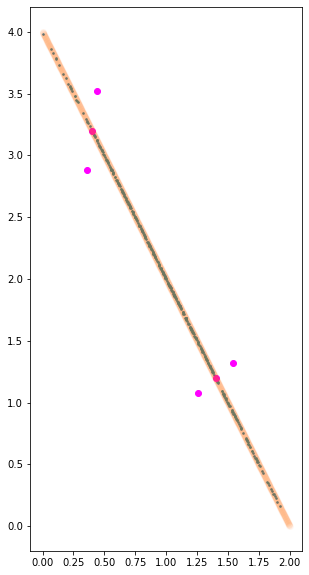

In [8]:
plt.figure(figsize=[10, 10])
plt.scatter(*y.T, s=2)
plt.scatter(*targets.T, c="magenta")
# plt.scatter(*t1, c="magenta")
# plt.scatter(*t2, c="magenta")
plt.scatter(*ref_points.T, c="C1", alpha=0.02)
plt.gca().axis("scaled")

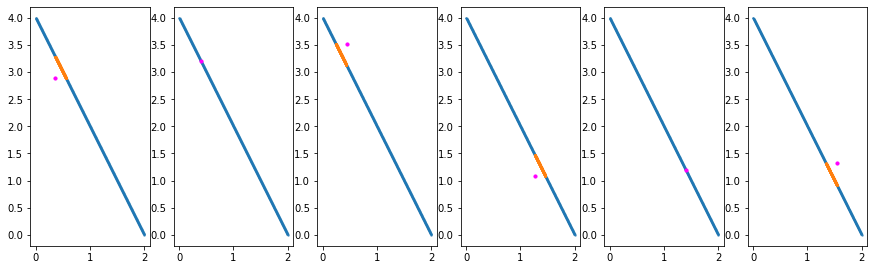

In [9]:
fig, axes = plt.subplots(1, 6,figsize=[15, 10])

target = targets[2]

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, ref_points) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)
    ax.axis('scaled')

In [10]:
from experiments.directed.data.wfg3_3obj_10dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG3
<built-in function WFG3> 3obj 10dim k:4 l:6 M:3


In [11]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg3_3d_refpoints")

In [19]:
targets = np.asarray(target_dict['WFG3_3obj_10dim'])
targets

array([[0.18 , 0.36 , 4.319],
       [0.2  , 0.4  , 4.799],
       [0.22 , 0.44 , 5.279],
       [0.63 , 1.261, 1.618],
       [0.7  , 1.401, 1.798],
       [0.77 , 1.541, 1.978]])

In [18]:
# t1 = ref_points[np.argsort(ref_points[:,0])][400]
# t2 = ref_points[np.argsort(ref_points[:,0])][1400]
# targets = np.zeros((6, n_obj))
# for i, t in enumerate([t1, t2]):
#     for j, a in enumerate([0.9, 1., 1.1]):
#         targets[i*3+j] = np.round(t*a, 3)
# targets

In [20]:
%matplotlib qt
fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection="3d")
ax.scatter(*y.T, s=2)
ax.scatter(*targets.T, c="magenta")
ax.scatter(*ref_points.T, c="C1", alpha=0.02)

In [15]:
fig, axes = plt.subplots(2, 3,figsize=[15, 10], subplot_kw={'projection': "3d"})

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, y) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)

In [16]:
fig, axes = plt.subplots(2, 3,figsize=[15, 10], subplot_kw={'projection': "3d"})

target = targets[2]

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, ref_points) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)

In [23]:
from experiments.directed.data.wfg3_4obj_10dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG3
<built-in function WFG3> 4obj 10dim k:6 l:4 M:4


In [24]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg3_4d_refpoints")
ref_points = Pareto_split(ref_points)[0]
ref_points.shape

(5000, 4)

In [31]:
targets = np.asarray(target_dict['WFG3_4obj_10dim'])
targets

array([[0.12602521, 0.25205041, 0.75615123, 5.18359672],
       [0.14002801, 0.28005601, 0.84016803, 5.75955191],
       [0.15403081, 0.30806161, 0.92418484, 6.3355071 ],
       [0.39607922, 0.79215843, 2.3764753 , 0.86273255],
       [0.44008802, 0.88017604, 2.64052811, 0.95859172],
       [0.48409682, 0.96819364, 2.90458092, 1.05445089]])

In [27]:
# t1 = ref_points[np.argsort(ref_points[:, 0])][1400]
# t2 = ref_points[np.argsort(ref_points[:, 0])][4400]
# print(t1)
# print(t2)

[0.14002801 0.28005601 0.84016803 5.75955191]
[0.44008802 0.88017604 2.64052811 0.95859172]


In [28]:
# targets = np.zeros((6, n_obj))
# for i, t in enumerate([t1, t2]):
#     for j, a in enumerate([0.9, 1., 1.1]):
#         targets[i*3+j] = t*a
# targets

array([[0.12602521, 0.25205041, 0.75615123, 5.18359672],
       [0.14002801, 0.28005601, 0.84016803, 5.75955191],
       [0.15403081, 0.30806161, 0.92418484, 6.3355071 ],
       [0.39607922, 0.79215843, 2.3764753 , 0.86273255],
       [0.44008802, 0.88017604, 2.64052811, 0.95859172],
       [0.48409682, 0.96819364, 2.90458092, 1.05445089]])

In [34]:
for t in target_dict.keys():
    print(t)

WFG1_2obj_3dim
WFG1_3obj_4dim
WFG1_4obj_5dim
WFG2_2obj_6dim
WFG2_3obj_6dim
WFG2_4obj_10dim
WFG3_2obj_6dim
WFG3_3obj_10dim
WFG3_4obj_10dim
ELLIPSOID_2obj
ELLIPSOID_3obj
ELLIPSOID_4obj
